解析文件： ./Mnist/Mnist/test-images.idx3-ubyte
魔数：2051，图片数：10000
28 28
解析文件： ./Mnist/Mnist/test-labels.idx1-ubyte
魔数：2049，标签数：10000
解析文件： ./Mnist/Mnist/train-images.idx3-ubyte
魔数：2051，图片数：60000
28 28
解析文件： ./Mnist/Mnist/train-labels.idx1-ubyte
魔数：2049，标签数：60000
训练完成
8155
训练完成
8145
训练完成
8050
训练完成
7730
训练完成
7570
训练完成
7350
训练完成
6958
训练完成
6807
训练完成
6565
训练完成
6039
训练完成
5659
训练完成
5434
训练完成
5251
训练完成
4343
训练完成
3964


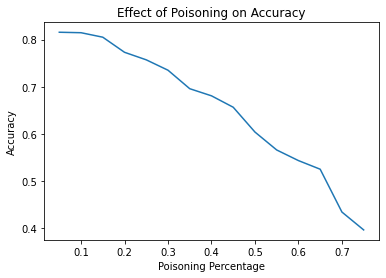

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from poison import poison_images
from classifier import DecisionTree, accuracy_score
from Parse_data import *

test_images = './Mnist/Mnist/test-images.idx3-ubyte'
test_labels = './Mnist/Mnist/test-labels.idx1-ubyte'
train_images = './Mnist/Mnist/train-images.idx3-ubyte'
train_labels = './Mnist/Mnist/train-labels.idx1-ubyte'

x_test = decode_idx3_ubyte(test_images)
y_test = decode_idx1_ubyte(test_labels)

x_test = x_test.reshape(10000, 28*28)
y_test = np.array(y_test)

poison_range = np.arange(0.05, 0.80, 0.05)  # 投毒比例范围
accuracy_scores = []  # 保存准确率

x_train = decode_idx3_ubyte(train_images)
x_train = x_train.reshape(60000, 28*28)  # 调整形状为(60000, 28, 28)

y_train = decode_idx1_ubyte(train_labels)
y_train = np.array(y_train)

for poison_percentage in poison_range:
    poisoned_x_train = poison_images(x_train, poison_percentage)

    # 构建决策树分类器
    tree = DecisionTree(max_depth=20, min_samples_split=2, criterion='gini')

    # 训练决策树
    tree.fit(poisoned_x_train, y_train)

    y_pred = tree.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

plt.plot(poison_range, accuracy_scores)
plt.xlabel('Poisoning Percentage')
plt.ylabel('Accuracy')
plt.title('Effect of Poisoning on Accuracy')
plt.show()
